
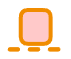

In [1]:
import sys
sys.path.append("..")
from cavsim2d.cavity import Cavity, Cavities, OperationPoints
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
# %matplotlib inline
import pprint
pp = pprint.PrettyPrinter(indent=4)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


  0%|          | 0/2 [00:00<?, ?it/s]

[['min', 'Epk/Eacc []'], ['min', 'Bpk/Eacc [mT/MV/m]'], ['min', 'ZL', [1, 2, 5]], ['min', 'ZT', [1, 2, 5]]]
['G0_C1_P', 'G0_C2_P', 'G0_C4_P'] ['G0_C1_P', 'G0_C2_P', 'G0_C4_P']
long Empty DataFrame
Columns: [ZL [max(1<f<2)], ZL [max(2<f<5)]]
Index: [] [[2.6861639548620255, 0.16154004537884717, 2.234572256607515], [0.33103887777721813, 0.03808983058507875, 0.07117324077207669]] 0 2
trans Empty DataFrame
Columns: [ZT [max(1<f<2)], ZT [max(2<f<5)]]
Index: [] [[41.196206645758046, 43.25087241073872, 74.19820265939128], [1.146587569784358, 0.4292739912328722, 15.131154208783942]] 0 2
       key     A     B     a     b    Ri     L         Req     alpha_i  \
0  G0_C1_P  62.0  74.0  15.0  15.0  72.5  93.5  174.812484  114.818175   
1  G0_C2_P  38.0  50.0  25.0  25.0  77.5  93.5  183.668243  119.362645   
2  G0_C4_P  26.0  26.0  35.0  35.0  62.5  93.5  182.457898  114.271528   

      alpha_o  freq [MHz]  Epk/Eacc []  Bpk/Eacc [mT/MV/m]  ZL [max(1<f<2)]  \
0  114.818175  801.578741     1.911811 

D:\Dropbox\cavsim2d\notebooks\..\cavsim2d\cavity.py:592: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ng = pd.concat([df_cross, df_mutation, df_chaos], ignore_index=True)


[['min', 'Epk/Eacc []'], ['min', 'Bpk/Eacc [mT/MV/m]'], ['min', 'ZL', [1, 2, 5]], ['min', 'ZT', [1, 2, 5]]]
['G0_C0_CO', 'G0_C1_CO', 'G0_C2_CO', 'G0_C3_CO', 'G0_C4_CO'] ['G0_C0_CO', 'G0_C1_CO', 'G0_C2_CO', 'G0_C3_CO', 'G0_C4_CO']
long Empty DataFrame
Columns: [ZL [max(1<f<2)], ZL [max(2<f<5)]]
Index: [] [[0.24852157318518647, 0.39643172148555417, 0.6202727612913532, 1.4904091149748113, 0.9792515731925071], [0.05118421030943039, 0.05934143369518469, 0.05410548678276539, 0.05551534754462049, 0.0542633393830494]] 0 2
trans Empty DataFrame
Columns: [ZT [max(1<f<2)], ZT [max(2<f<5)]]
Index: [] [[50.290818694867156, 56.24884693040382, 45.159376988616664, 51.842071659994446, 45.70608110525338], [10.115932333205873, 13.830497200390159, 0.7058322186610639, 15.182814902382232, 0.635419161341551]] 0 2
        key     A     B          a          b         Ri     L         Req  \
0  G0_C0_CO  36.0  58.0  30.000000  25.000000  73.333333  93.5  184.668739   
1  G0_C1_CO  36.0  46.0  28.333333  23.333

D:\Dropbox\cavsim2d\notebooks\..\cavsim2d\cavity.py:592: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ng = pd.concat([df_cross, df_mutation, df_chaos], ignore_index=True)


End time:  2024-08-18 13:10:05.996165


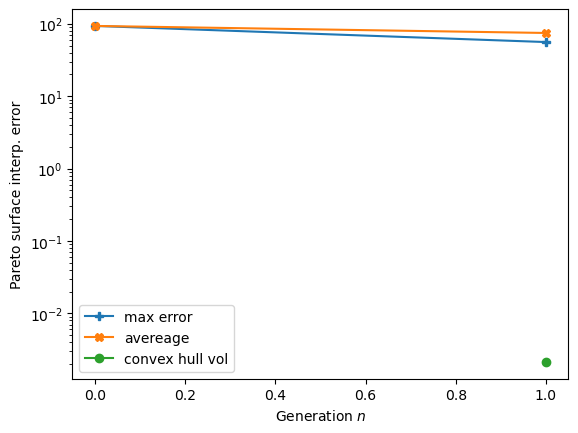

In [2]:
cavs = Cavities([])
# must first save cavities
cavs.save('D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')
cell_type = 'end-end-cell'

optimisation_config = {
    'initial_points': 5,
    'method': {
        'LHS': {'seed': 5},
        # 'Sobol Sequence': {'index': 2},
        # 'Random': {},
        # 'Uniform': {},
        },
    # 'mid-cell': [1, 2, 3, 3, 6, 5, 2],  # must enter if mid-end cell selected
    'tune_config': {
        'freqs': 801.58,
        'parameters': 'Req',
        'cell_types': cell_type,
        'processes': 4,
        'eigenmode_config': {'n_cells': 1,
                             'n_modules': 1,
                             'f_shift': 0,
                             'bc': 33,
                             'beampipes': 'both',
                             'uq_config': {
                                 'variables': ['A'],
                                 'objectives': ["Epk/Eacc []", "Bpk/Eacc [mT/MV/m]", "R/Q [Ohm]", "G [Ohm]"],
                                 'delta': [0.05],
                                 'processes': 4,
                                 'distribution': 'gaussian',
                                 'method': ['Quadrature', 'Stroud3'], 
                                 'cell_type': 'mid-cell',
                                 'cell complexity': 'simplecell'
                                }
                            },
    },
    'wakefield_config': {'n_cells': 1, 'n_modules': 1,
                         'MROT': 2, 'MT': 4, 'NFS': 10000, 'UBT': 50, 'bunch_length': 25,
                         'DDR_SIG': 0.1, 'DDZ_SIG': 0.1,
                         'WG_M': None, 'marker': '',
                        'uq_config': {
                            'variables': ['A'],
                            'objectives': [["ZL", [1, 2, 5]], ["ZT", [2, 3, 4]]],
                            'delta': [0.05],
                            'processes': 4,
                            'distribution': 'gaussian',
                            'method': ['Quadrature', 'Stroud3'],
                            'cell_type': 'mid-cell',
                            'cell complexity': 'simplecell'
                            }
                        },
    'optimisation by': 'pareto',
    'crossover_factor': 5,
    'elites_for_crossover': 2,
    'mutation_factor': 5,
    'chaos_factor': 5,
    'processes': 3,
    'no_of_generation': 2,
    'bounds': {'A': [20.0, 80.0],
               'B': [20.0, 80.0],
               'a': [10.0, 60.0],
               'b': [10., 60.0],
               'Ri': [60.0, 85.0],
               'L': [93.5, 93.5],
               'Req': [170.0, 170.0]},
    'objectives': [
        # ['equal', 'freq [MHz]', 801.58],
                      ['min', 'Epk/Eacc []'],
                      ['min', 'Bpk/Eacc [mT/MV/m]'],
                      ['min', 'ZL', [1, 2, 5]],
                      ['min', 'ZT', [1, 2, 5]],
                  ],
    'weights': [1, 1, 1, 1, 1, 1]
}
cavs.run_optimisation(optimisation_config)